In [2]:
import pandas as pd
import numpy as np
import seaborn  as sb
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

## 01. 데이터 전처리

In [10]:
final_df = pd.read_csv('is_risky_final.csv')
final_df

상권_코드_명  기준_년_코드  기준_분기_코드  average(is_risky)
0    DMC(디지털미디어시티)     2022         1               0.15
1    DMC(디지털미디어시티)     2022         2               0.21
2    DMC(디지털미디어시티)     2022         3               0.14
3    DMC(디지털미디어시티)     2022         4               0.29
4    DMC(디지털미디어시티)     2023         1               0.23
..             ...      ...       ...                ...
560            화곡역     2022         1               0.17
561            화곡역     2022         2               0.47
562            화곡역     2022         3               0.38
563            화곡역     2022         4               0.38
564            화곡역     2023         1               0.45

[565 rows x 4 columns]

In [11]:
plt.rc('font', family='Malgun Gothic')

In [3]:
import matplotlib.font_manager as fm

font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
for font_path in font_list:
    font_name = fm.FontProperties(fname=font_path).get_name()
    print(font_name)
    
font_name = "NanumGothic"

font_path = fm.findfont(fm.FontProperties(family=font_name))

Noto Sans Ugaritic
Hiragino Sans GB
Noto Sans Tai Le
Noto Sans Modi
Galvji
Noto Nastaliq Urdu
Superclarendon
Hoefler Text
Helvetica Neue
Rockwell
STIXIntegralsSm
Trebuchet MS
Apple SD Gothic Neo
Noto Sans Syloti Nagri
Wingdings 2
Noto Sans Wancho
Noto Sans Old Permic
STIXSizeTwoSym
STIXVariants
Noto Sans Old North Arabian


RuntimeError: In FT2Font: Could not set the fontsize (invalid pixel size; error code 0x17)

In [4]:
df1 = pd.read_csv('final.csv', encoding = 'cp949')
df1 = df1.iloc[:, 1:]

In [5]:
df2 = pd.read_csv('isrisky_397.csv', encoding='cp949')

selected_columns = ['기준_년_코드', '기준_분기_코드', '상권_코드', '상권_코드_명', '개업_율', '폐업_률', 'average(is_risky)']
selected_df2 = df2[selected_columns]

In [6]:
selected_df2.columns = ['기준_년_코드', '기준_분기_코드', '상권_코드', '상권_코드_명', '개업률', '폐업률', '경영위기_평균']

In [7]:
final_df = selected_df2.merge(df1, on=['기준_년_코드', '기준_분기_코드', '상권_코드', '상권_코드_명'], how='left')
final_df.drop(['기준_년_코드', '기준_분기_코드', '상권_코드', '상권_코드_명', '개업_율', '폐업_률'], axis=1, inplace=True)
final_df

개업률  폐업률  경영위기_평균  유사_업종_점포_수  주중_매출_비율  주말_매출_비율  남성_매출_비율  여성_매출_비율  \
0   0.01 0.02     0.22        1203     79.15     20.87     56.74     43.28   
1   0.02 0.02     0.28        1194     75.18     24.87     54.64     45.44   
2   0.02 0.03     0.17        1184     78.72     21.41     54.13     46.05   
3   0.02 0.02     0.11        1182     76.35     23.75     57.77     42.25   
4   0.02 0.01     0.11        1667     71.14     28.93     47.56     52.56   
..   ...  ...      ...         ...       ...       ...       ...       ...   
391 0.03 0.03     0.19        2979     70.33     29.76     43.59     56.48   
392 0.02 0.01     0.17         636     78.11     21.97     47.50     52.58   
393 0.03 0.03     0.47         634     73.14     27.03     50.67     49.42   
394 0.01 0.03     0.38         627     76.19     23.83     50.83     49.36   
395 0.02 0.02     0.38         631     77.36     22.81     51.61     48.50   

     연령대_1020_매출_비율  연령대_3040_매출_비율  연령대_5060_매출_비율  집객시설_수  교통_인프라  총 상주인구 수  \
0             11.92           41.79           46.46      62       3      2694   
1              9.44           43.56           47.08      62       3      2694   
2             11.10           41.54           47.46      62       3      2694   
3             10.35           43.23           46.60      62       3      2694   
4             25.21           44.88           30.16      42       3      3152   
..              ...             ...             ...     ...     ...       ...   
391           40.93           37.78           21.70      91      22      4789   
392           23.13           44.92           32.32      88      16      2748   
393           20.22           46.36           33.67      88      16      2748   
394           20.08           41.61           38.61      88      16      2748   
395           17.94           44.75           37.50      88      16      2748   

     총_직장_인구_수  총_생활인구_수  월_평균_소득_금액  
0        10268   1430185     3494644  
1        10268   1490392     3494644  
2        10268   1522873     3494644  
3        10268   1613064     3494644  
4         6518   1977135     3602514  
..         ...       ...         ...  
391       9580   3897068     2934520  
392        927   1102013     2624496  
393        927   1168431     2624496  
394        927   1163547     2624496  
395        927   1208993     2624496  

[396 rows x 17 columns]

In [64]:
final_df[final_df['경영위기_평균'] > 0.7]

기준_년_코드  기준_분기_코드    상권_코드 상권_코드_명  개업률  폐업률  경영위기_평균  유사_업종_점포_수  \
100     2022         3  2120245     둔촌역 0.02 0.02     0.80         922   

     주중_매출_비율  주말_매출_비율  ...  연령대_3040_매출_비율  연령대_5060_매출_비율  개업_율  폐업_률  \
100     72.57     27.49  ...           42.84           45.67  1.68  1.30   

     집객시설_수  교통_인프라  총 상주인구 수  총_직장_인구_수  총_생활인구_수  월_평균_소득_금액  
100      80       7      2664       1884   1041722     2946954  

[1 rows x 23 columns]

In [13]:
# final_df.to_csv('seoul.csv', index = False)

In [152]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396 entries, 0 to 395
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   개업률             396 non-null    float64
 1   폐업률             396 non-null    float64
 2   경영위기_평균         396 non-null    float64
 3   유사_업종_점포_수      396 non-null    int64  
 4   주중_매출_비율        396 non-null    float64
 5   주말_매출_비율        396 non-null    float64
 6   남성_매출_비율        396 non-null    float64
 7   여성_매출_비율        396 non-null    float64
 8   연령대_1020_매출_비율  396 non-null    float64
 9   연령대_3040_매출_비율  396 non-null    float64
 10  연령대_5060_매출_비율  396 non-null    float64
 11  집객시설_수          396 non-null    int64  
 12  교통_인프라          396 non-null    int64  
 13  총 상주인구 수        396 non-null    int64  
 14  총_직장_인구_수       396 non-null    int64  
 15  총_생활인구_수        396 non-null    int64  
 16  월_평균_소득_금액      396 non-null    int64  
dtypes: float64(10), int64(7)
memory usa

## 02. 상관분석

In [8]:
no_isrisky_df = final_df.drop('경영위기_평균', axis = 1)
no_isrisky_df

개업률       폐업률  유사_업종_점포_수   주중_매출_비율   주말_매출_비율   남성_매출_비율  \
0    0.014963  0.020781        1203  79.153846  20.871795  56.743590   
1    0.019263  0.017588        1194  75.179487  24.871795  54.641026   
2    0.021959  0.032939        1184  78.717949  21.410256  54.128205   
3    0.018613  0.019459        1182  76.350000  23.750000  57.775000   
4    0.022196  0.012597        1667  71.139535  28.930233  47.558140   
..        ...       ...         ...        ...        ...        ...   
391  0.031219  0.028197        2979  70.326087  29.760870  43.586957   
392  0.020440  0.014151         636  78.105263  21.973684  47.500000   
393  0.031546  0.033123         634  73.138889  27.027778  50.666667   
394  0.014354  0.025518         627  76.194444  23.833333  50.833333   
395  0.020602  0.017433         631  77.361111  22.805556  51.611111   

      여성_매출_비율  연령대_1020_매출_비율  연령대_3040_매출_비율  연령대_5060_매출_비율  집객시설_수  \
0    43.282051       11.923077       41.794872       46.461538      62   
1    45.435897        9.435897       43.564103       47.076923      62   
2    46.051282       11.102564       41.538462       47.461538      62   
3    42.250000       10.350000       43.225000       46.600000      62   
4    52.558140       25.209302       44.883721       30.162791      42   
..         ...             ...             ...             ...     ...   
391  56.478261       40.934783       37.782609       21.695652      91   
392  52.578947       23.131579       44.921053       32.315789      88   
393  49.416667       20.222222       46.361111       33.666667      88   
394  49.361111       20.083333       41.611111       38.611111      88   
395  48.500000       17.944444       44.750000       37.500000      88   

     교통_인프라  총 상주인구 수  총_직장_인구_수  총_생활인구_수  월_평균_소득_금액  
0         3      2694      10268   1430185     3494644  
1         3      2694      10268   1490392     3494644  
2         3      2694      10268   1522873     3494644  
3         3      2694      10268   1613064     3494644  
4         3      3152       6518   1977135     3602514  
..      ...       ...        ...       ...         ...  
391      22      4789       9580   3897068     2934520  
392      16      2748        927   1102013     2624496  
393      16      2748        927   1168431     2624496  
394      16      2748        927   1163547     2624496  
395      16      2748        927   1208993     2624496  

[396 rows x 16 columns]

In [9]:
# scaling x
corr_df = no_isrisky_df.corr(method='pearson')

In [10]:
# scaling o (scaling x와 결과 동일)
scaler = MinMaxScaler()
scaler.fit(no_isrisky_df)
scaled_values = scaler.transform(no_isrisky_df)

scaled_df = pd.DataFrame(scaled_values, columns=no_isrisky_df.columns)
scaled_corr_df = scaled_df.corr(method = 'pearson')

##### 상관계수가 높은 순서대로 나열하기
+ values: 데이터프레임을 numpy 배열로 반환 (array([['주중_매출_비율', '주말_매출_비율'], ['주말_매출_비율', '주중_매출_비율']...)
+ map: 첫번째 인자로 들어온 함수를 두번째 인자 각각에 적용
+ zip: 두 개 이상의 iterable(반복 가능한) 객체를 받아서 동일한 인덱스에 위치한 요소들을 튜플로 묶어줌
+ drop_duplication: 중복된 행을 제거함

In [11]:
sorted_corr = corr_df.abs().unstack().sort_values(ascending=False)

unique_sorted_corr = sorted_corr[sorted_corr != 1]

unique_sorted_corr = unique_sorted_corr.reset_index()
unique_sorted_corr['level_0'], unique_sorted_corr['level_1'] = zip(*map(sorted, unique_sorted_corr[['level_0', 'level_1']].values))
unique_sorted_corr = unique_sorted_corr.drop_duplicates(subset=['level_0', 'level_1'])
unique_sorted_corr

level_0         level_1         0
0          주말_매출_비율        주중_매출_비율  0.999965
2          남성_매출_비율        여성_매출_비율  0.999960
4    연령대_1020_매출_비율  연령대_5060_매출_비율  0.763279
6        유사_업종_점포_수          집객시설_수  0.755856
8        유사_업종_점포_수       총_직장_인구_수  0.658594
..              ...             ...       ...
230      월_평균_소득_금액        총_생활인구_수  0.018226
232  연령대_5060_매출_비율      월_평균_소득_금액  0.017125
234             개업률        총_생활인구_수  0.012720
236          교통_인프라  연령대_3040_매출_비율  0.008419
238          교통_인프라      월_평균_소득_금액  0.006197

[120 rows x 3 columns]

/usr/local/lib/python3.11/site-packages/seaborn/utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<Axes: >

/usr/local/opt/ipython/libexec/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/local/opt/ipython/libexec/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


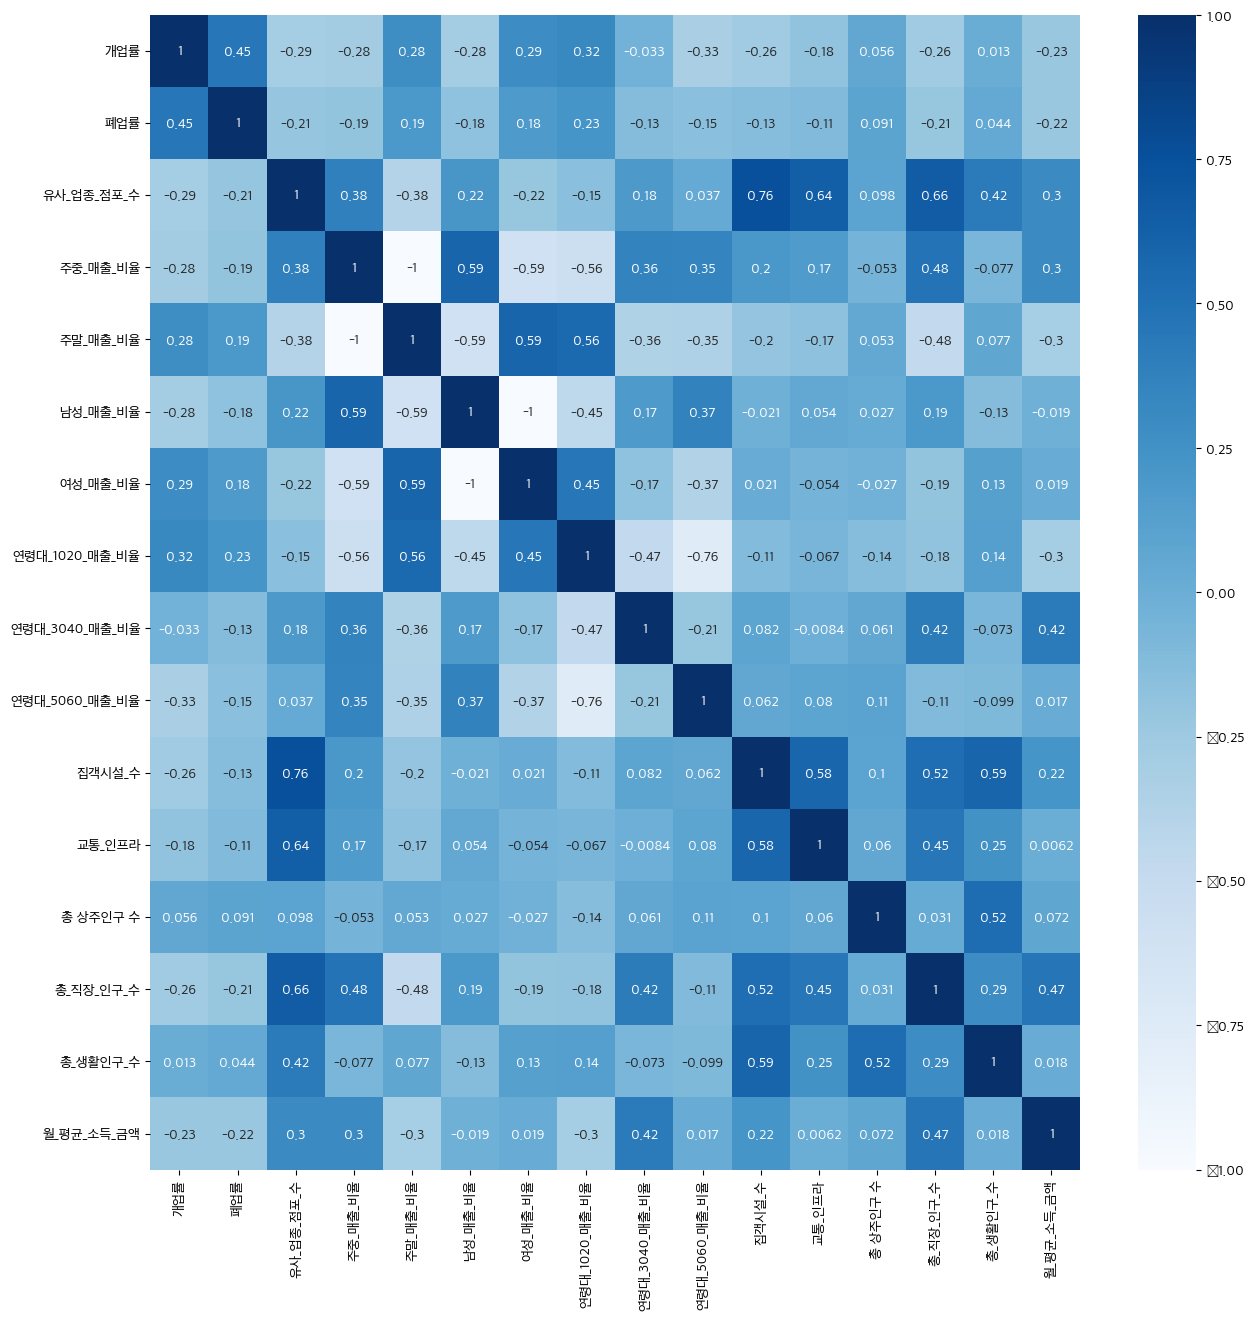

In [12]:
plt.rcParams['font.family'] = font_name
plt.rcParams['font.sans-serif'] = font_name
plt.rcParams["figure.figsize"] = (15,15)
sb.heatmap(scaled_df.corr(method='pearson'),
          annot = True,
          cmap = 'Blues',
          vmin = -1, vmax = 1)

## 03. 다중선형회귀분석

[Ordinary Least Squares 가정]
+ 정규성: 종속변수가 정규분포를 따른다면, 잔차 또한 정규분포를 따르며 평균은 0이다.
+ 독립성: 종속변수는 서로 독립적이어야 한다.
+ 선형성: 종속변수와 독립변수가 선형관계에 있다면, 잔차와 예측치 사이에 어떤 체계적인 관계가 있으면 안 된다.
+ 등분산성:
+ 다중공선성: 독립변수 간 선형관계가 있으면 안 된다.
+ 이외에도 이상치 제거 등이 필요하다.

[가정 충족 여부 확인]('https://ysyblog.tistory.com/120')

In [3]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

pd.options.display.float_format = '{:.2f}'.format

#### 1) 독립변수와 종속변수 간 관계 파악

/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

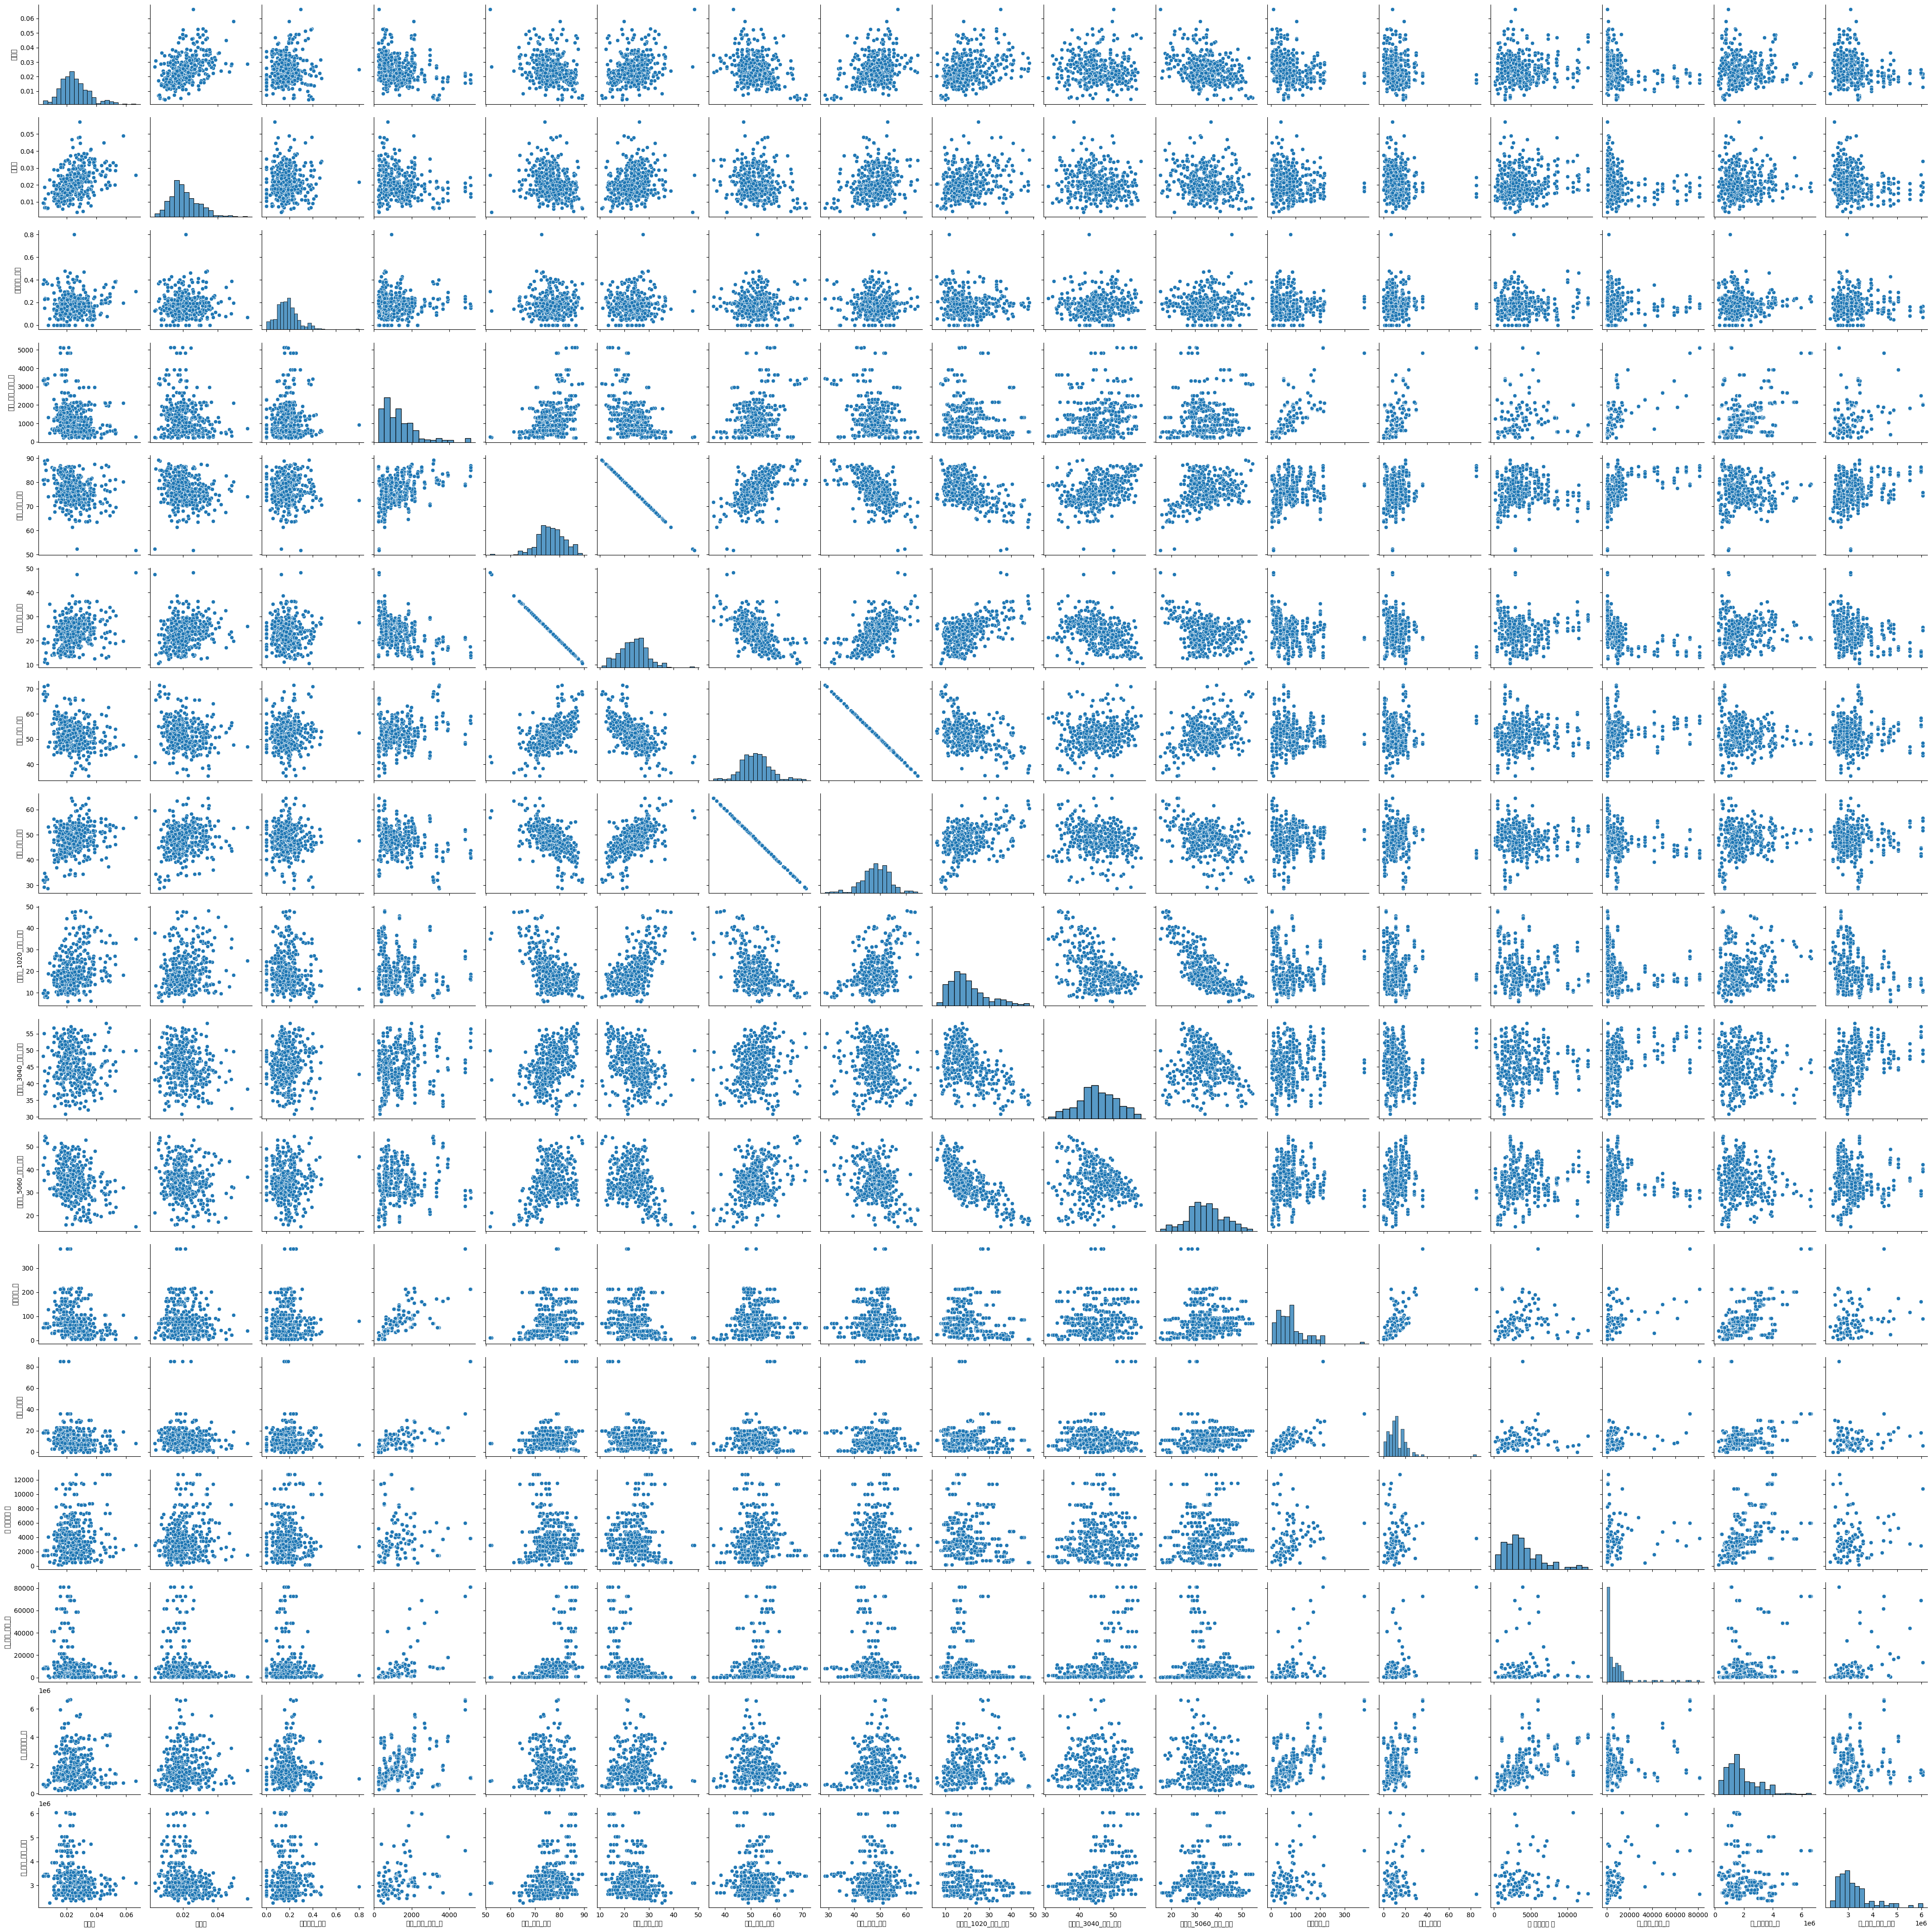

In [9]:
sb.pairplot(final_df)
plt.show()

#### 2) 분석 성능 향상

In [34]:
# 분석 성능 향상 1. scaling
# 효과 없음
scaler = MinMaxScaler()
scaler.fit(final_df)
scaled_values = scaler.transform(final_df)

scaled_df = pd.DataFrame(scaled_values, columns=final_df.columns)

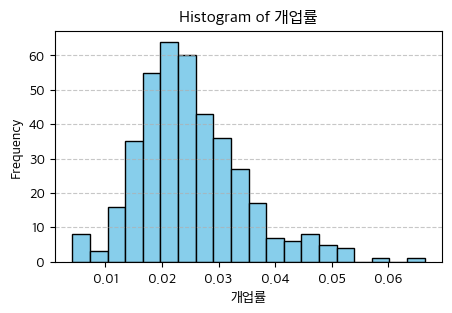

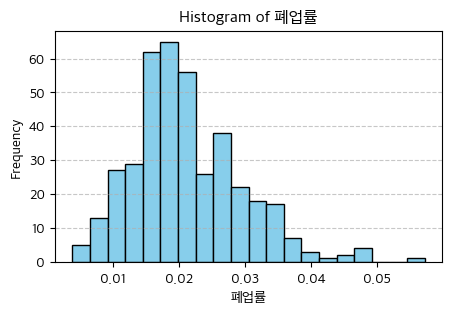

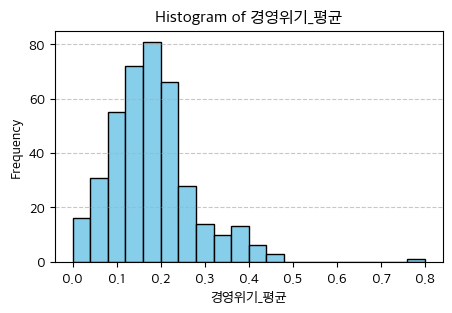

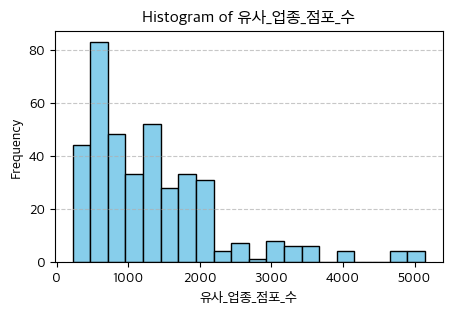

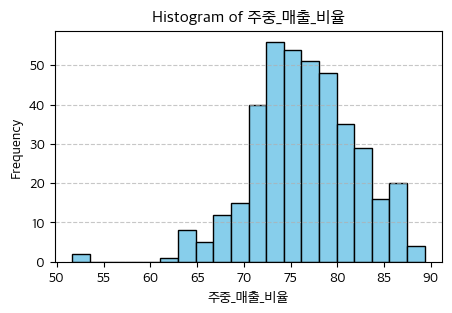

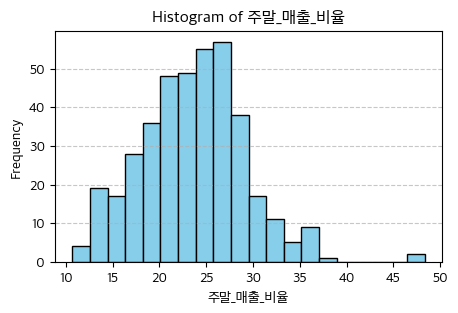

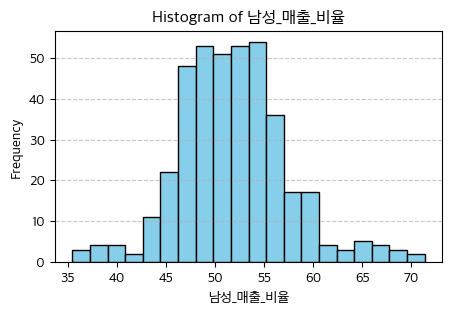

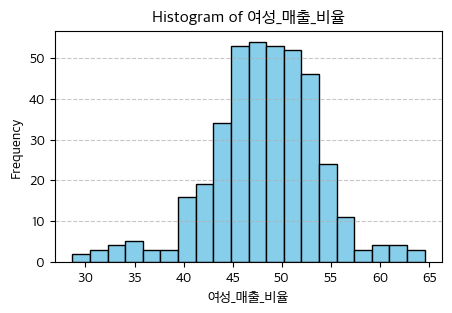

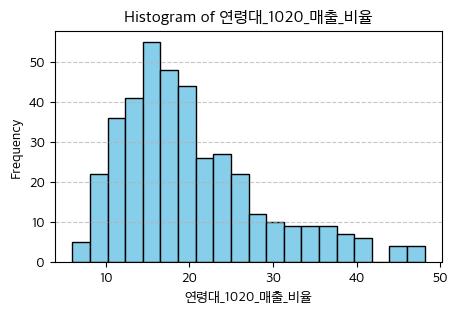

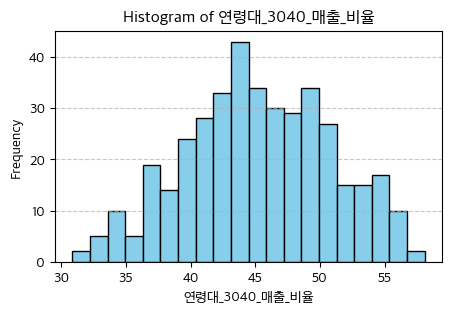

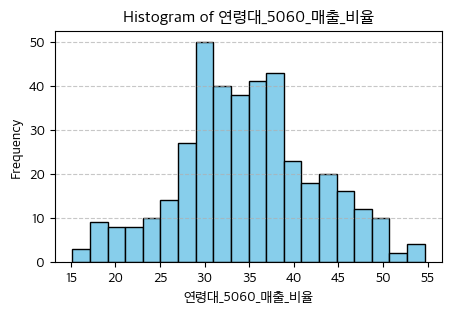

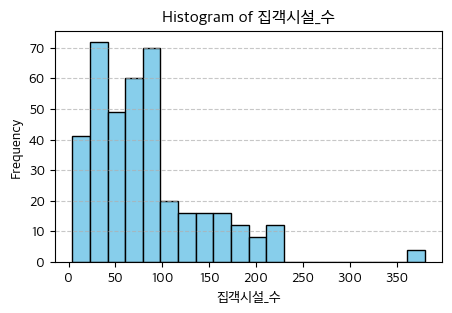

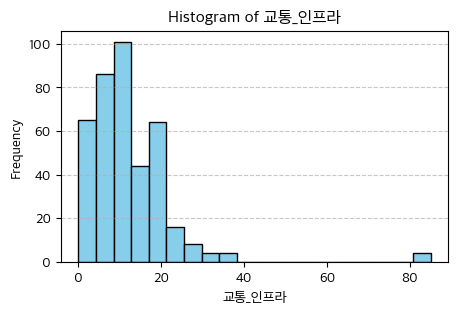

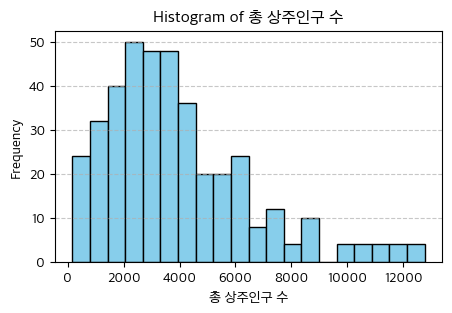

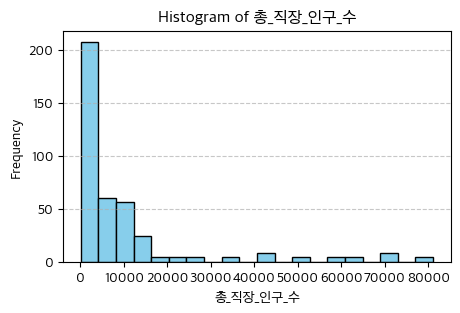

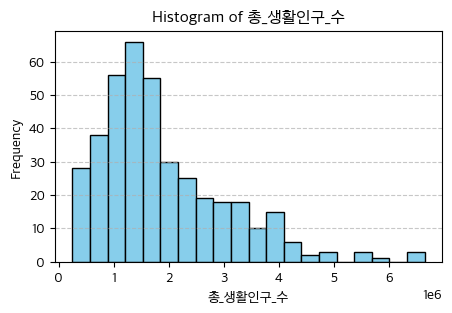

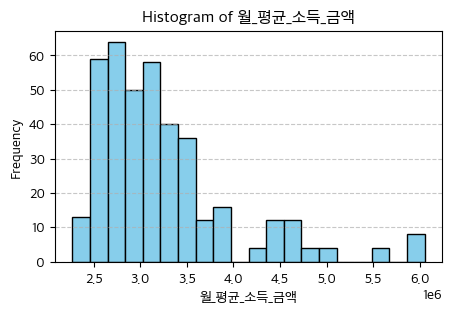

In [118]:
# 분석 성능 향상 2. 데이터 분포 확인
# 유사 업종 점포 수, 집객시설 수, 교통 인프라, 총 직장 인구, 월 평균 소득 금액 정규 분포 X
# 총 상주 인구는 스케일링?
# 이상치가 꽤 있어서 이상치 처리 필요!! (종속변수 포함)

for column in final_df.columns:
    plt.figure(figsize=(5, 3))
    plt.hist(final_df[column], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

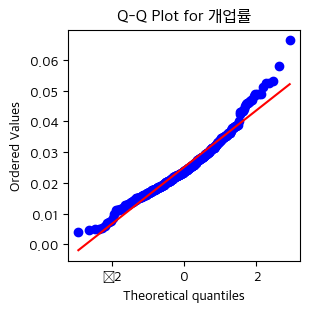

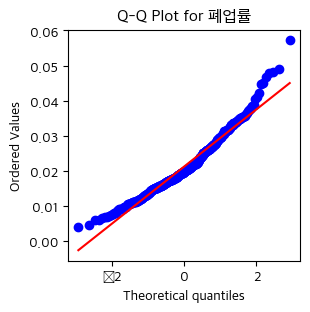

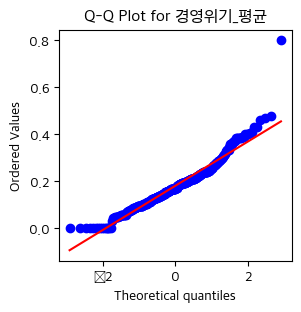

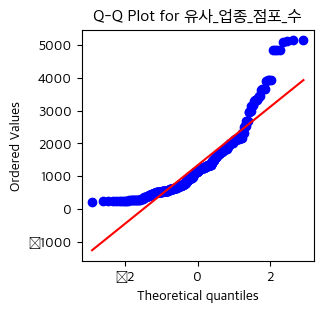

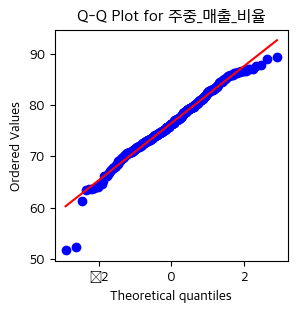

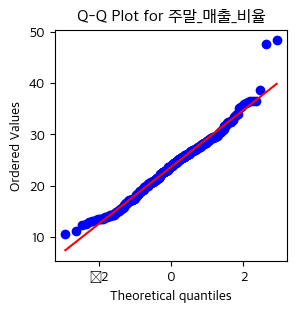

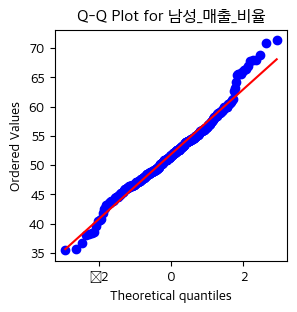

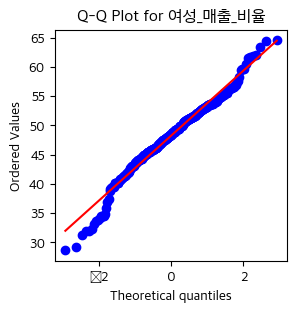

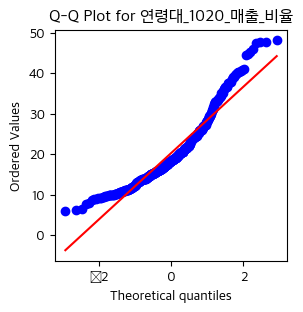

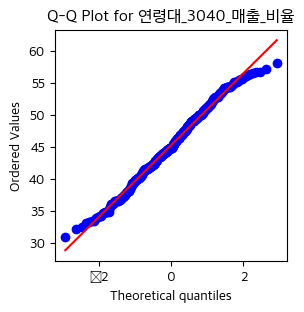

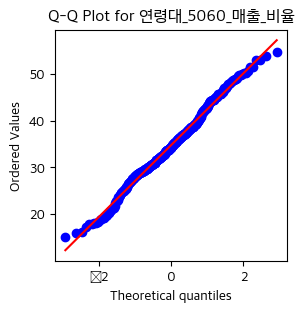

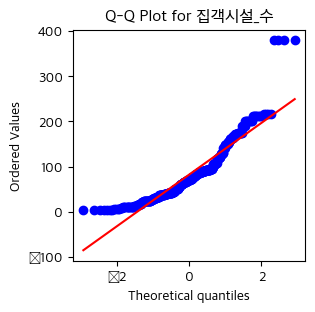

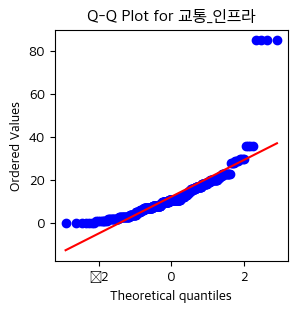

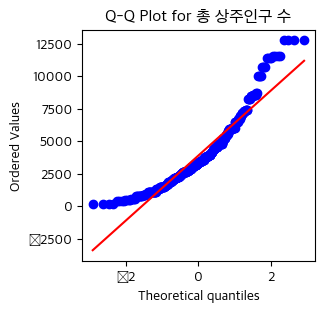

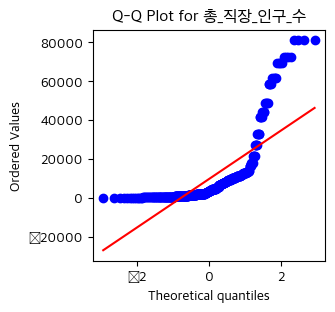

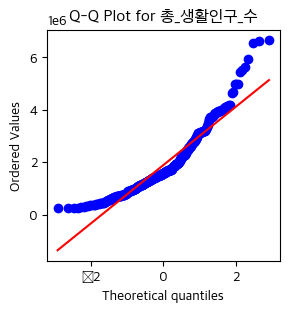

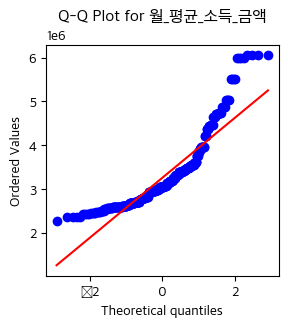

In [119]:
# 분석 성능 향상 3. 데이터 정규성 확인(Q-Q plot)
# 유사 업종 점포 수, 집객 시설 수, 교통 인프라, 총 직장 인구 수, 월 평균 소득 금액 정규 분포 X
# 연령대 1020 매출 비율, 총 상주인구 수, 총 생활인구 수 애매..
import scipy.stats as stats

for variable in final_df.columns:

    data = final_df[variable]

    plt.figure(figsize=(3, 3))
    
    stats.probplot(data, dist="norm", plot=plt)
    plt.title(f"Q-Q Plot for {variable}")
    plt.show()

In [55]:
# 분석 성능 향상 4. 제곱근 변환
# 유사 업종 점포 수, 집객 시설 수, 교통 인프라, 총 직장 인구 수, 월 평균 소득 금액 > 제곱근 변환
# 후진제거법에서 총 직장 인구 수가 빠지고, ['연령대_1020_매출_비율', '집객시설_수', '총_생활인구_수']만 남음

sqrt_df = final_df
sqrt_variables = ['유사_업종_점포_수', '집객시설_수', '교통_인프라', '총_직장_인구_수', '월_평균_소득_금액']
for var in sqrt_variables:
    sqrt_df[var] = sqrt_df[var].apply(lambda x: np.sqrt(x) if x > 0 else x)

In [135]:
# 분석 성능 향상 5. 로그 변환
# 유사 업종 점포 수, 집객 시설 수, 교통 인프라, 총 직장 인구 수, 월 평균 소득 금액 > 로그 변환

log_df = final_df
log_variables = ['유사_업종_점포_수', '집객시설_수', '교통_인프라', '총_직장_인구_수', '월_평균_소득_금액']
log_df[log_variables] = log_df[log_variables].apply(np.log)
# log_df

#### 3.1) 모든 변수

In [24]:
x1 = final_df.drop('경영위기_평균', axis=1)
y1 = final_df['경영위기_평균']

lr = sm.OLS(y1, x1)
result1 = lr.fit()

In [25]:
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                경영위기_평균   R-squared (uncentered):                   0.786
Model:                            OLS   Adj. R-squared (uncentered):              0.777
Method:                 Least Squares   F-statistic:                              87.38
Date:                Sat, 02 Sep 2023   Prob (F-statistic):                   1.80e-116
Time:                        16:47:33   Log-Likelihood:                          374.00
No. Observations:                 396   AIC:                                     -716.0
Df Residuals:                     380   BIC:                                     -652.3
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
개업률                0.3821      0.644      0.593      0.553      -0.884       1.648
폐업률                0.4744      0.668      0.711      0.478      -0.838       1.787
유사_업종_점포_수      2.266e-05   9.98e-06      2.270      0.024    3.03e-06    4.23e-05
주중_매출_비율           0.0122      0.075      0.162      0.871      -0.136       0.160
주말_매출_비율           0.0134      0.075      0.178      0.859      -0.135       0.162
남성_매출_비율           0.0021      0.075      0.028      0.978      -0.145       0.149
여성_매출_비율           0.0011      0.075      0.015      0.988      -0.146       0.148
연령대_1020_매출_비율    -0.0141      0.044     -0.319      0.750      -0.101       0.073
연령대_3040_매출_비율    -0.0114      0.044     -0.258      0.796      -0.098       0.076
연령대_5060_매출_비율    -0.0131      0.044     -0.296      0.767      -0.100       0.074
집객시설_수            -0.0004      0.000     -2.518      0.012      -0.001   -8.67e-05
교통_인프라             0.0003      0.001      0.367      0.714      -0.001       0.002
총 상주인구 수       -3.917e-06   2.55e-06     -1.533      0.126   -8.94e-06    1.11e-06
총_직장_인구_수      -9.247e-07   5.06e-07     -1.829      0.068   -1.92e-06    6.95e-08
총_생활인구_수        1.743e-08   7.38e-09      2.363      0.019    2.92e-09    3.19e-08
월_평균_소득_금액     -1.413e-09   8.77e-09     -0.161      0.872   -1.87e-08    1.58e-08
==============================================================================
Omnibus:                      113.222   Durbin-Watson:                   1.291
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              459.991
Skew:                           1.200   Prob(JB):                    1.30e-100
Kurtosis:                       7.703   Cond. No.                     6.12e+08
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 6.12e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
vif1 = pd.DataFrame()
vif1["VIF Factor"] = [variance_inflation_factor(x1.values, i) for i in range(x1.shape[1])]
vif1["features"] = x1.columns
vif1 = vif1.sort_values("VIF Factor").reset_index(drop=True)
vif1

VIF Factor        features
0         3.98       총_직장_인구_수
1         5.46          교통_인프라
2         6.16        총 상주인구 수
3         9.84             폐업률
4        11.07          집객시설_수
5        11.50        총_생활인구_수
6        11.51      유사_업종_점포_수
7        12.79             개업률
8        36.87      월_평균_소득_금액
9     40497.30  연령대_1020_매출_비율
10   106649.15  연령대_5060_매출_비율
11   144354.87        주말_매출_비율
12   174865.31  연령대_3040_매출_비율
13   563043.63        여성_매출_비율
14   650522.99        남성_매출_비율
15  1432497.71        주중_매출_비율

#### 3.2) 남성,여성,주중,주말(4개) 제외

In [27]:
x2 = final_df.drop(['경영위기_평균', '주중_매출_비율', '주말_매출_비율', '남성_매출_비율', '여성_매출_비율'], axis=1)
y2 = final_df['경영위기_평균']

lr = sm.OLS(y2, x2)
result2 = lr.fit()

In [29]:
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                경영위기_평균   R-squared (uncentered):                   0.786
Model:                            OLS   Adj. R-squared (uncentered):              0.779
Method:                 Least Squares   F-statistic:                              117.3
Date:                Sat, 02 Sep 2023   Prob (F-statistic):                   2.53e-120
Time:                        16:50:31   Log-Likelihood:                          373.47
No. Observations:                 396   AIC:                                     -722.9
Df Residuals:                     384   BIC:                                     -675.2
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
개업률                0.3038      0.632      0.481      0.631      -0.938       1.546
폐업률                0.4425      0.663      0.667      0.505      -0.861       1.746
유사_업종_점포_수      2.314e-05   9.32e-06      2.483      0.013    4.82e-06    4.15e-05
연령대_1020_매출_비율     0.0001      0.001      0.218      0.827      -0.001       0.001
연령대_3040_매출_비율     0.0027      0.001      3.722      0.000       0.001       0.004
연령대_5060_매출_비율     0.0011      0.001      1.689      0.092      -0.000       0.002
집객시설_수            -0.0004      0.000     -2.721      0.007      -0.001      -0.000
교통_인프라             0.0003      0.001      0.370      0.712      -0.001       0.002
총 상주인구 수       -3.555e-06   2.52e-06     -1.412      0.159    -8.5e-06     1.4e-06
총_직장_인구_수      -1.001e-06    4.7e-07     -2.132      0.034   -1.92e-06   -7.81e-08
총_생활인구_수        1.746e-08    7.3e-09      2.392      0.017    3.11e-09    3.18e-08
월_평균_소득_금액     -3.231e-09   8.23e-09     -0.393      0.695   -1.94e-08    1.29e-08
==============================================================================
Omnibus:                      116.000   Durbin-Watson:                   1.291
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              487.240
Skew:                           1.220   Prob(JB):                    1.57e-106
Kurtosis:                       7.855   Cond. No.                     6.09e+08
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 6.09e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
vif2 = pd.DataFrame()
vif2["VIF Factor"] = [variance_inflation_factor(x2.values, i) for i in range(x2.shape[1])]
vif2["features"] = x2.columns
vif2 = vif2.sort_values("VIF Factor").reset_index(drop=True)
vif2

VIF Factor        features
0         3.46       총_직장_인구_수
1         5.25          교통_인프라
2         6.03        총 상주인구 수
3         9.36  연령대_1020_매출_비율
4         9.78             폐업률
5        10.11      유사_업종_점포_수
6        10.45          집객시설_수
7        11.35        총_생활인구_수
8        12.40             개업률
9        21.61  연령대_5060_매출_비율
10       32.67      월_평균_소득_금액
11       48.40  연령대_3040_매출_비율

#### 3.3) 단계별 선택법
전진선택법에서 후진소거법을 추가한 방법. 전진선택범과 후진소거법의 장단점을 보완하는 방법이라 가장 추천됨.

그러나, 전진선택법의 경우 첫번째 단계에서 변수 하나씩 단순회귀분석을 진행하여 p-value가 제일 작고 0.05 이하인 변수를 모형에 추가함. 우리가 가진 모든 변수로 단순선형회귀분석을 진행했는데, <b> 다 p-value 0.05를 넘어서 처음부터 변수를 선택하지 못하는 문제가 발생함.</b> 

<b> 따라서, 변수를 하나씩 추가해나가는 전진선택법이 아닌 변수를 하나씩 소거하는 후진소거법이 적합함. </b>

In [86]:
all_variables = final_df.drop(['경영위기_평균', '주중_매출_비율', '주말_매출_비율', '남성_매출_비율', '여성_매출_비율'], axis=1).columns.tolist()
y = final_df['경영위기_평균']

In [80]:
selected_variables = []

p_enter = 0.05
p_remove = 0.05

sv_per_step = [] # 각 스텝별로 선택된 변수들
adjusted_r_squared = [] # 각 스텝별로 수정된 결정계수
steps = []
step = 0

while len(all_variables) > 0:
    remainder = list(set(all_variables) - set(selected_variables)) # seleted_variable에 있는 원소들을 all_variable에서 제거
    pval = pd.Series(index=remainder) # 변수의 p-value

    # 기존에 포함된 변수(selected)와 새로운 변수(all) 하나씩 돌아가면서 선형 모형 적합하기
    for col in remainder:
        
        X = final_df[selected_variables+[col]]
        X = sm.add_constant(X)
        model = sm.OLS(y,X).fit()
        pval[col] = model.pvalues[col]

        print('[' + col + ']' + "p-value: " + str(model.pvalues[col]))

    min_pval = pval.min()
    
    if min_pval < p_enter:
        
        selected_variables.append(pval.idxmin()) # p-value가 가장 낮은 index 추가

        # 선택된 변수들 중 어떤 변수를 제거할지 선택하기
        while len(selected_variables) > 0:
            selected_X = final[selected_variables]
            selected_X = sm.add_constant(selected_X)
            selected_pval = sum.OLS(y, selected_X).fit().pvalues[1:] # 절편항의 p-value 제거
            max_pval = selected_pval.max()
            
            if max_pval >= p_remove:
                remove_variable = selected_pval.idxmax()
                selected_variables.remove(remove_variable)
            else:
                break

        step += 1
        step.append(step)
        adj_r_squared = sm.OLS(y, sm.add_constant(final_df[selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    
    else:
        break

[개업률]p-value: 0.2146081067542652
[총_생활인구_수]p-value: 0.3795358207955961
[연령대_1020_매출_비율]p-value: 0.46951673520633375
[유사_업종_점포_수]p-value: 0.6454192333300222
[폐업률]p-value: 0.3485156618228913
[총 상주인구 수]p-value: 0.5890319448921315
[연령대_3040_매출_비율]p-value: 0.3589850781577485
[월_평균_소득_금액]p-value: 0.3589545980512764
[교통_인프라]p-value: 0.7801319474562236
[집객시설_수]p-value: 0.3416282209378906
[총_직장_인구_수]p-value: 0.25504833043520003
[연령대_5060_매출_비율]p-value: 0.8989367195900246


#### 3.4) 후진소거법
모든 변수가 포함된 모형에서 설명력이 가장 적은 변수를 제거해나가는 방법  
구현과정이 간단하고 변수가 많은 데이터에 적용 가능하다는 장점이 있지만, 한번 제외된 변수는 다시는 모형에 포함될 수 없으며 일치성을 만족하지 않음

모든 변수의 p-value가 높게 나타나는 편이라 0.05를 기준으로 했을 땐 선택된 변수가 없었음.  
p-value의 기준으로 0.1로 상향한 결과, <b> '유사_업종_점포_수', '연령대_1020_매출_비율', '집객시설_수', '총_직장_인구_수', '총_생활인구_수' </b> 가 선택됨.

In [76]:
all_variables = final_df.drop(['경영위기_평균', '주중_매출_비율', '주말_매출_비율', '남성_매출_비율', '여성_매출_비율'], axis=1).columns.tolist()
y = final_df['경영위기_평균']

In [79]:
selected_variables = all_variables
p_remove = 0.1

sv_per_step = []
adjusted_r_squared = []
steps = []
step = 0

while len(selected_variables) > 0:
    X = sm.add_constant(sqrt_df[selected_variables])
    p_vals = sm.OLS(y,X).fit().pvalues[1:]
    max_pval = p_vals.max()

    if max_pval >= p_remove:
        selected_variables.remove(p_vals.idxmax())

        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y, sm.add_constant(sqrt_df[selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    else:
        break

In [80]:
selected_variables

['유사_업종_점포_수', '연령대_1020_매출_비율', '집객시설_수', '총_직장_인구_수', '총_생활인구_수']

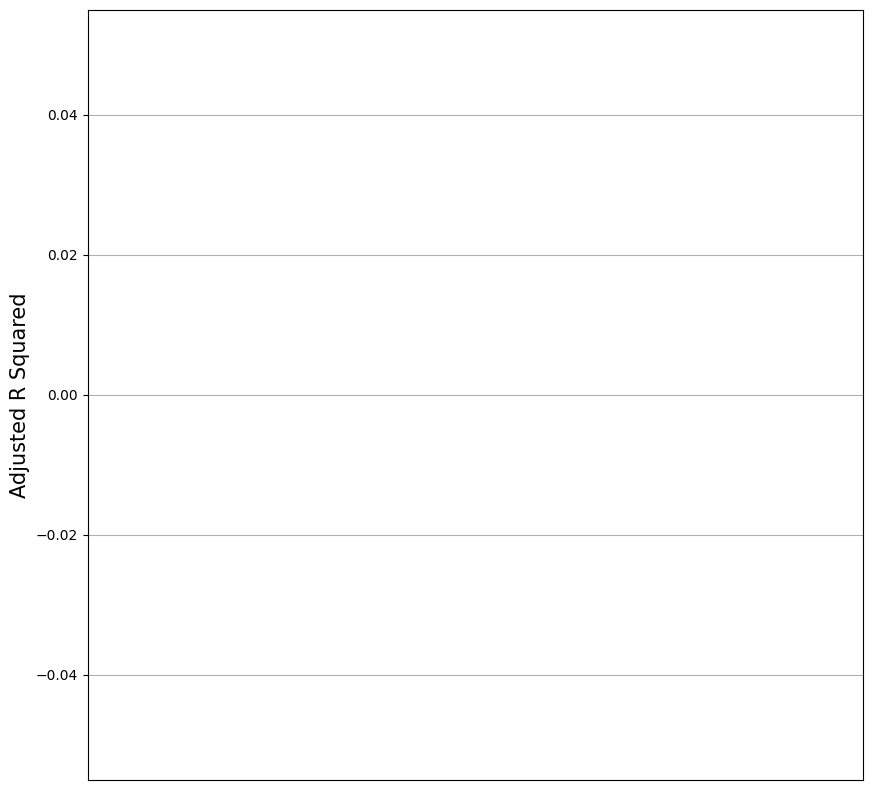

In [81]:
fig = plt.figure(figsize=(10,10))
fig.set_facecolor('white')
 
font_size = 15
plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=12)
plt.plot(steps,adjusted_r_squared, marker='o')
    
plt.ylabel('Adjusted R Squared',fontsize=font_size)
plt.grid(True)
plt.show()